In [7]:
!pip install numpy panda scipy mlxtend seaborn matplotlib scikit-learn

In [12]:
# modules we'll use
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
missing_value = ["N/a", "na", " ", np.nan]
df = pd.read_csv("nutrition.csv", na_values=missing_value)
nutrition_data = pd.read_csv("nutrition.csv", na_values=missing_value)

# set seed for reproducibility
np.random.seed(0) 

In [13]:
df.sample(5)


,id,calories,proteins,fat,carbohydrate,name,image
1228,1229,144.0,12.0,10.2,0.0,Telur Penyu,https://awsimages.detik.net.id/community/media...
330,331,17.5,3.3,2.3,39.5,Dodonkol,https://www.piknikdong.com/wp-content/uploads/...
1215,1216,361.0,19.3,31.9,0.7,Telur Ayam bagian kuning,https://assets.hops.id/crop/0x0:0x0/750x500/we...
438,439,204.0,34.2,5.6,1.9,Ikan cakalang asap mentah,https://jurnal6.com/wp-content/uploads/2021/11...
1315,1316,123.0,1.8,0.7,27.9,Ubi Jalar Putih,https://cdn.idntimes.com/content-images/commun...


In [14]:
nutrition_data.sample(5)

,id,calories,proteins,fat,carbohydrate,name,image
196,197,120.0,4.7,2.4,19.9,Cabai rawit segar,https://asset.kompas.com/crops/0bQZazreqC3rXuo...
903,904,902.0,0.0,100.0,0.0,Minyak Kacang Tanah,https://nilaigizi.com/assets/images/produk/pro...
105,106,364.0,3.4,0.7,86.3,Beras ganyong,https://www.agrofarm.co.id/wp-content/uploads/...
776,777,141.0,10.2,1.3,23.2,Koro Benguk tempe,https://imgx.parapuan.co/file/parapuan/mobile/...
1052,1053,153.0,11.3,8.4,8.0,Rujak cingur,https://lingkar.news/wp-content/uploads/2023/0...


In [15]:
df.head(10)

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
5,6,85.0,0.9,6.5,7.7,Alpukat segar,https://katakabar.com/assets/images/upload/new...
6,7,96.0,3.7,0.6,19.1,Ampas kacang hijau,https://images.tokopedia.net/img/cache/215-squ...
7,8,414.0,26.6,18.3,41.3,Ampas Tahu,https://palpres.disway.id/upload/9e9c1ba592cac...
8,9,75.0,4.1,2.1,10.7,Ampas tahu kukus,https://cdns.diadona.id/diadona.id/resized/640...
9,10,67.0,5.0,2.1,8.1,Ampas tahu mentah,https://cdn-image.hipwee.com/wp-content/upload...


In [16]:
df.shape

(1346, 7)

In [17]:
df.dtypes

id                int64
calories        float64
proteins        float64
fat             float64
carbohydrate    float64
name             object
image            object
dtype: object

In [18]:
df.nunique()

id              1346
calories         472
proteins         312
fat              279
carbohydrate     544
name            1346
image           1307
dtype: int64

Text(0.5, 1.0, 'carbohydrate distribution')

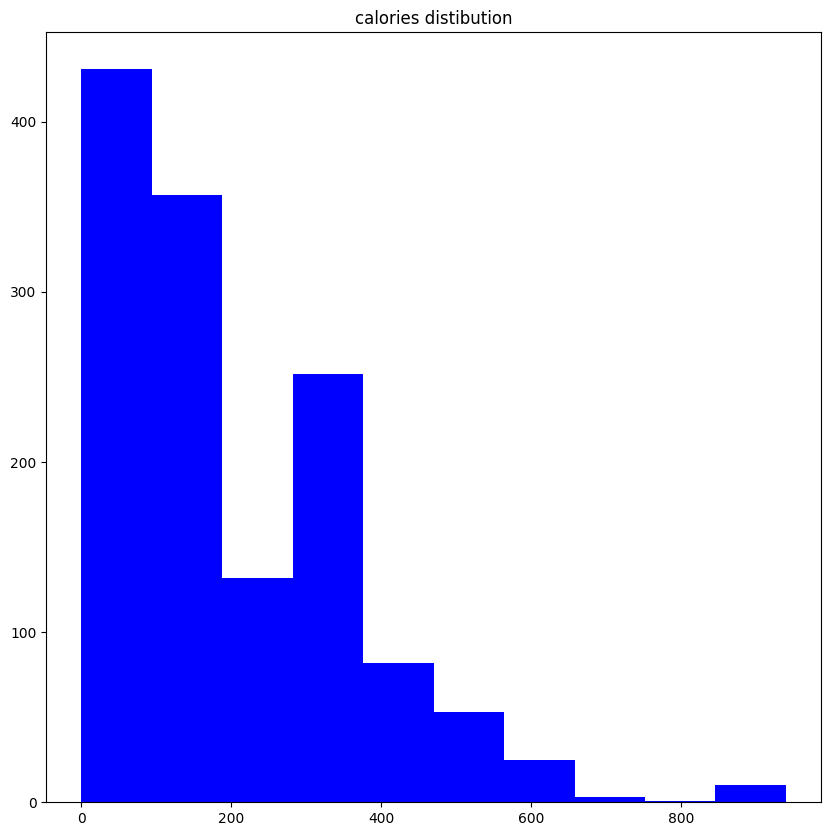

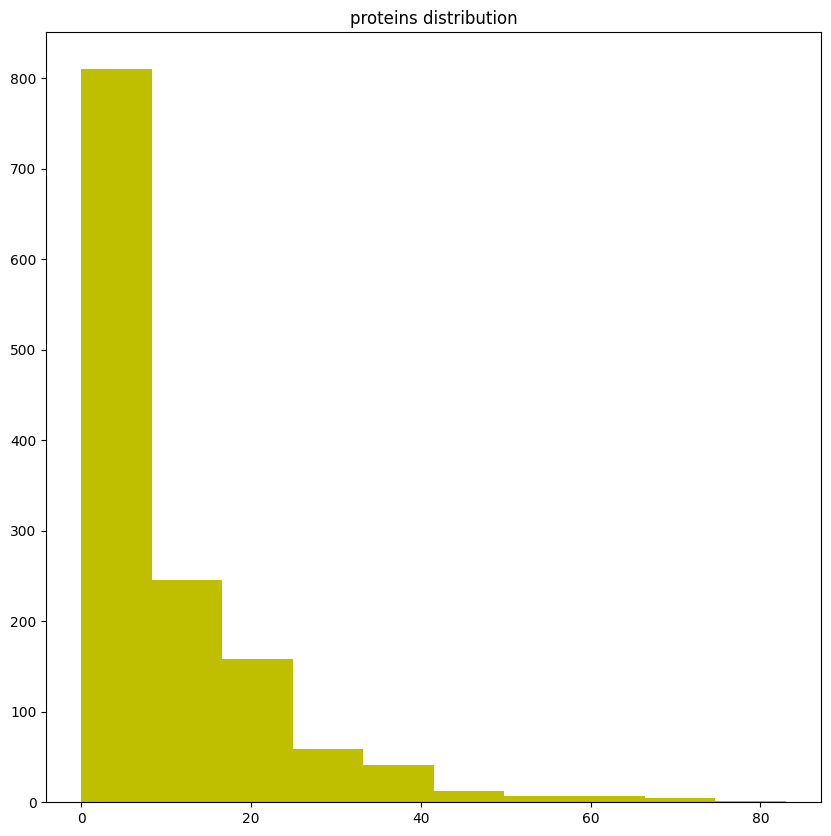

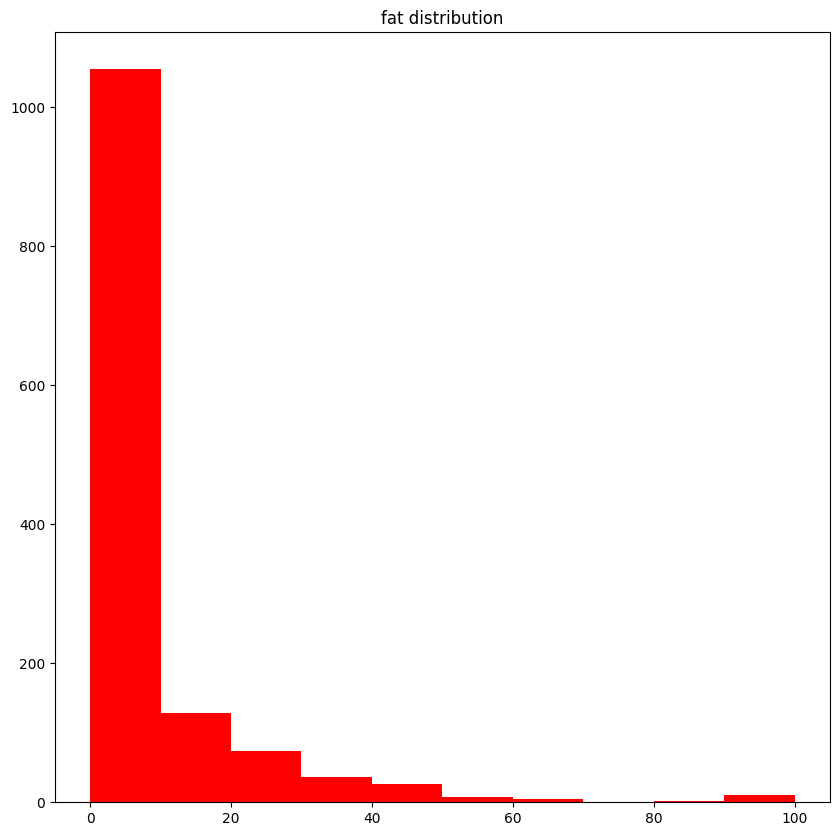

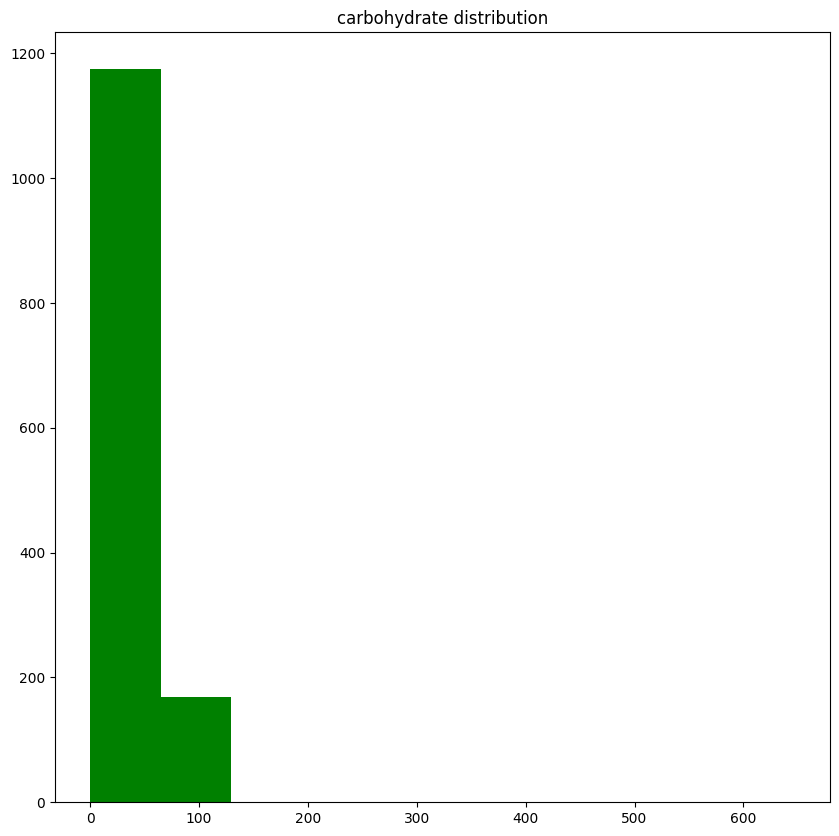

In [20]:
plt.figure(figsize=(10,10))
plt.hist(df['calories'],color='b')
plt.title("calories distibution")

plt.figure(figsize=(10,10))
plt.hist(df['proteins'],color='y')
plt.title("proteins distribution")

plt.figure(figsize=(10,10))
plt.hist(df['fat'],color='r')
plt.title("fat distribution")

plt.figure(figsize=(10,10))
plt.hist(df['carbohydrate'],color='g')
plt.title("carbohydrate distribution")

In [21]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
image           0
dtype: int64

In [22]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

In [23]:
df[['name']]

,name
0,Abon
1,Abon haruwan
2,Agar-agar
3,Akar tonjong segar
4,Aletoge segar
...,...
1341,Wortel Segar
1342,Wortel kukus
1343,Wortel rebus
1344,Yangko


In [24]:
df

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar,https://www.astronauts.id/blog/wp-content/uplo...
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus,https://www.wikihow.com/images_en/thumb/b/bf/S...
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus,https://asset-a.grid.id/crop/0x222:594x690/700...
1344,1345,254.0,3.0,1.1,58.1,Yangko,https://serikatnews.com/wp-content/uploads/202...


<Axes: >

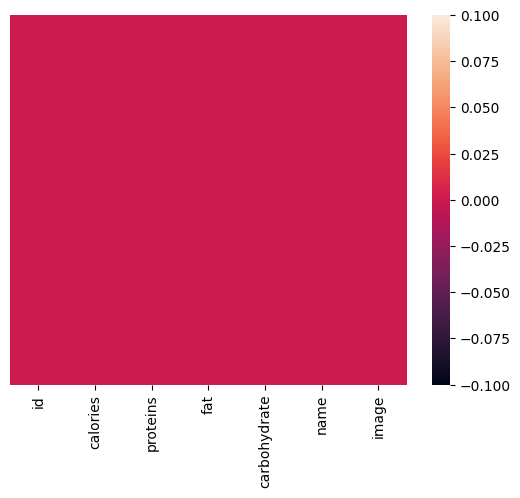

In [25]:
sns.heatmap(bmi_data.isnull(), yticklabels=False)

In [60]:
nutrition_data

,id,calories,proteins,fat,carbohydrate,name,image,fat_category,proteins_category
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...,rendah,rendah
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...,sedang,rendah
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...,rendah,rendah
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...,rendah,rendah
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...,rendah,rendah
...,...,...,...,...,...,...,...,...,...
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar,https://www.astronauts.id/blog/wp-content/uplo...,rendah,rendah
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus,https://www.wikihow.com/images_en/thumb/b/bf/S...,rendah,rendah
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus,https://asset-a.grid.id/crop/0x222:594x690/700...,rendah,rendah
1344,1345,254.0,3.0,1.1,58.1,Yangko,https://serikatnews.com/wp-content/uploads/202...,rendah,rendah
